In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

In [64]:
dataset = pd.read_csv('student_evaluation.csv')

In [65]:
dataset.shape

(5820, 33)

In [66]:
dataset.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [67]:
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [68]:
dataset.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [69]:
from  sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

In [70]:
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
pred = kmeans.predict(dataset)
pred

array([1, 1, 0, ..., 0, 1, 1])

In [72]:
kmeans.inertia_

231353.7586857733

In [73]:
kmeans.score(dataset)

-231353.75868577315

In [74]:
SSE = []

In [75]:
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(dataset)
    SSE.append(kmeans.inertia_)
    

In [76]:
frame = pd.DataFrame({'Clusters': range(1,20), 'SSE': SSE})

In [77]:
frame

,Clusters,SSE
0,1,373025.672852
1,2,231353.758686
2,3,180375.713822
3,4,152932.972528
4,5,133015.589696
5,6,119620.252464
6,7,112340.898128
7,8,105896.042941
8,9,101318.617785
9,10,97525.220104


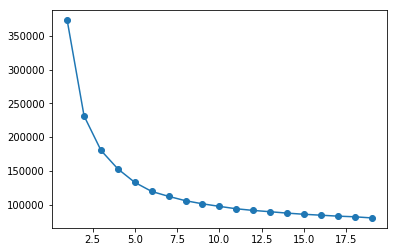

In [78]:
plt.plot(frame['Clusters'],frame['SSE'],marker='o')
plt.show()

In [79]:
# use scaling

from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(dataset)

In [81]:
SSE = []

In [82]:
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scale)
    SSE.append(kmeans.inertia_)

In [83]:
frame = pd.DataFrame({'Clusters': range(1,20), 'SSE': SSE})

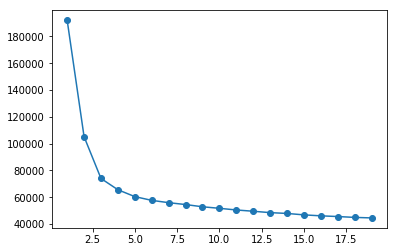

In [84]:
plt.plot(frame['Clusters'],frame['SSE'],marker='o')
plt.show()